In [1]:
import numpy
%matplotlib inline
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp1d
import seaborn as sns
import matplotlib.colors as mcolors

In [21]:
nx = 400
ny = 400
xmin = 0
xmax = 2
ymin = 0
ymax = 2

e = 1.60217662 * 10 ** (-19)
kT = 4.11 * 10 ** (-21)

dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)

p  = numpy.zeros((ny, nx))
x  = numpy.linspace(xmin, xmax, nx)
y  = numpy.linspace(xmin, xmax, ny)

In [22]:
def laplace2d(p, y, dx, dy, l1norm_target):
    l1norm = 1
    pn = numpy.empty_like(p)

    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) + dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) / (2 * (dx**2 + dy**2)))
        p[0, :] = 0
        p[ny-1, :] = 0
        p[:, 0] = 0
        p[:, nx-1] = 0
        l1norm = (numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) / numpy.sum(numpy.abs(pn[:])))
     
    return p

In [23]:
p = laplace2d(p, y, dx, dy, 1e-4)

c:\users\masterdesky\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


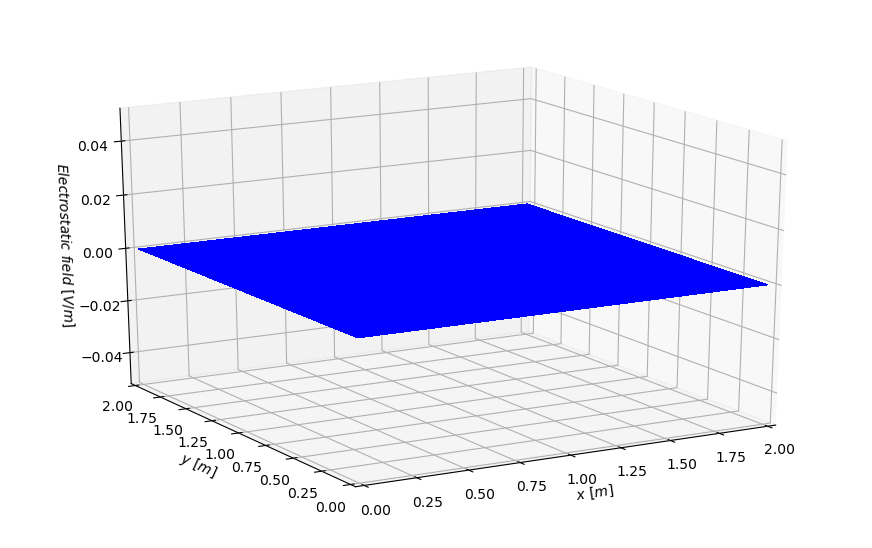

In [24]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.winter, linewidth=0, antialiased=False)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.view_init(20, 240)
ax.set_xlabel('$x\ [m]$')
ax.set_ylabel('$y\ [m]$')
ax.set_zlabel('$Electrostatic\ field\ [V/m]$')
fig.savefig("lap0.png")

In [25]:
p  = numpy.zeros((ny, nx))
b  = numpy.zeros((ny, nx))
x  = numpy.linspace(xmin, xmax, nx)
y  = numpy.linspace(xmin, xmax, ny)

b[int(ny / 4), int(nx / 4)] = 200
b[int(ny / 2), int(nx / 4)] = -200
b[int(3 * ny / 4), int(3 * nx / 4)] = -200

In [26]:
def poisson2d(p, y, b, dx, dy, l1norm_target):
    l1norm = 1
    pn = numpy.empty_like(p)

    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, :-2]) + dx**2 * (pn[2:, 1:-1] + pn[:-2, 1:-1]) - b[1:-1, 1:-1] * dx**2 * dy**2) / (2 * (dx**2 + dy**2)))
        p[0, :] = 0
        p[ny-1, :] = 0
        p[:, 0] = 0
        p[:, nx-1] = 0
        l1norm = (numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) / numpy.sum(numpy.abs(pn[:])))
     
    return p

In [27]:
p = poisson2d(p, y, b, dx, dy, 1e-4)

c:\users\masterdesky\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


KeyboardInterrupt: 

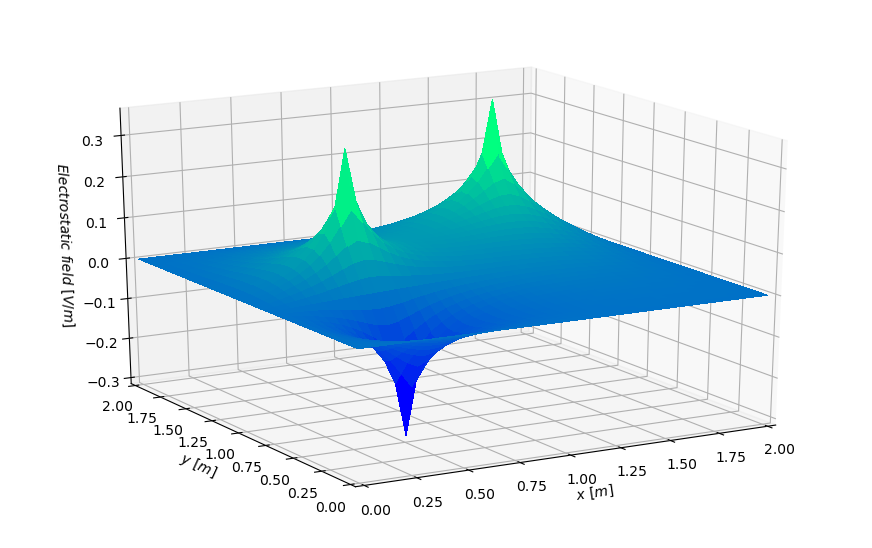

In [9]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.winter, linewidth=0, antialiased=False)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.view_init(20, 240)
ax.set_xlabel('$x\ [m]$')
ax.set_ylabel('$y\ [m]$')
ax.set_zlabel('$Electrostatic\ field\ [V/m]$')
fig.savefig("poi0.png")

In [10]:
p  = numpy.zeros((ny, nx))
b  = numpy.zeros((ny, nx))
x  = numpy.linspace(xmin, xmax, nx)
y  = numpy.linspace(xmin, xmax, ny)

b[int(ny / 4), int(nx / 4)] = 200
b[int(ny / 2), int(nx / 4)] = -200
b[int(3 * ny / 4), int(3 * nx / 4)] = -200

In [11]:
def poissonboltzmann2d(p, y, b, dx, dy, l1norm_t):
    l1norm = 1
    pn = numpy.empty_like(p)

    while l1norm > l1norm_t:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, :-2]) + dx**2 * (pn[2:, 1:-1] + pn[:-2, 1:-1]) - b[1:-1, 1:-1] * dx**2 * dy**2) / (2 * (dx**2 + dy**2) - b [1:-1, 1:-1] * dx**2 * dy**2 * e / kT))
        p[0, :] = 0
        p[ny-1, :] = 0
        p[:, 0] = 0
        p[:, nx-1] = 0
        l1norm = (numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) / numpy.sum(numpy.abs(pn[:])))
     
    return p

In [12]:
p = poissonboltzmann2d(p, y, b, dx, dy, 1e-4)

c:\users\masterdesky\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


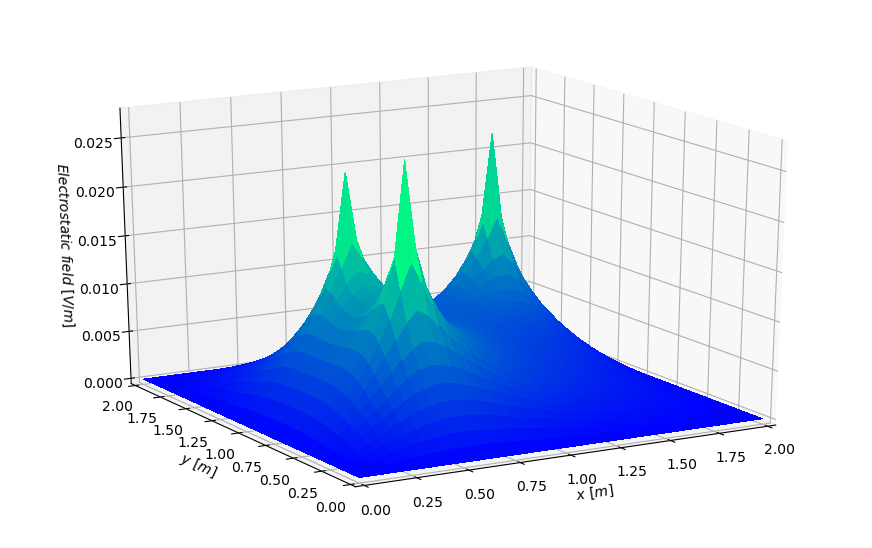

In [13]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.winter, linewidth=0, antialiased=False)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.view_init(20, 240)
ax.set_xlabel('$x\ [m]$')
ax.set_ylabel('$y\ [m]$')
ax.set_zlabel('$Electrostatic\ field\ [V/m]$')
fig.savefig("poibol0.png")

In [14]:
def boltzmann(r, r_0, C):
    return r_0 ** numpy.exp(-C*r) - 1

step = 1 / 20
coords = numpy.arange(0,0.2,step)
Xc, Yc = numpy.meshgrid(coords, coords)
Zc = numpy.zeros(Xc.shape)


n_peaks = 100
peak_height = -100

n = 0
while n < n_peaks:
    k = numpy.random.choice(coords)
    l = numpy.random.choice(coords)
    v = numpy.random.random()
    if v < boltzmann(numpy.sqrt(k**2+l**2), r_0=2, C=38):
        x_coord = numpy.where(coords == k)[0][0]
        y_coord = numpy.where(coords == l)[0][0]
        Zc[x_coord][y_coord] = peak_height
        n += 1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

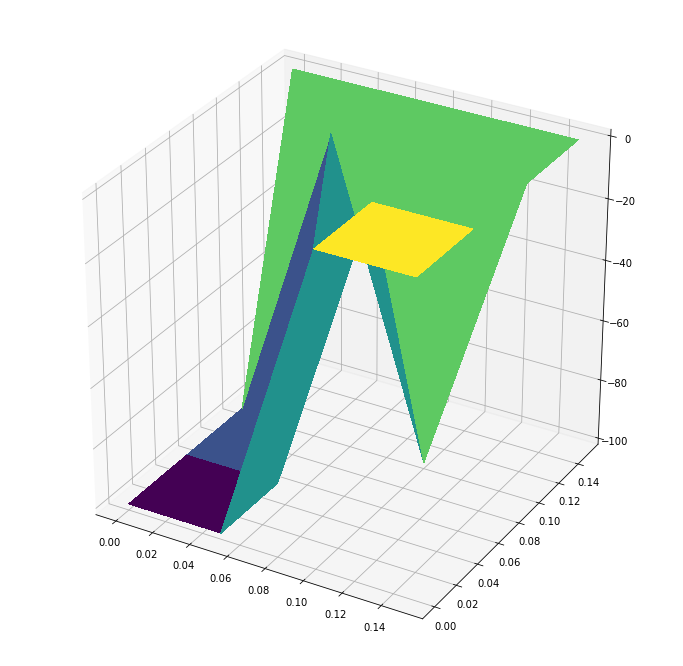

In [15]:
fig = pyplot.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(Xc, Yc, Zc, cmap=cm.viridis, linewidth=0, antialiased=False)

pyplot.show()

In [16]:
p  = numpy.zeros((ny, nx))

x  = numpy.linspace(xmin, 0.2, nx)
y  = numpy.linspace(xmin, 0.2, ny)

p = poissonboltzmann2d(p, y, Zc, dx, dy, 1e-4)

ValueError: operands could not be broadcast together with shapes (38,38) (2,2) 

In [ ]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.winter, linewidth=0, antialiased=False)
ax.set_xlim(xmin, 0.2)
ax.set_ylim(ymin, 0.2)
ax.view_init(20, 240)
ax.set_xlabel('$x\ [m]$')
ax.set_ylabel('$y\ [m]$')
ax.set_zlabel('$Electrostatic\ field\ [V/m]$')
fig.savefig("poibol0.png")